In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import numpy as np

import myaqc

from src import utils

from src.cond_pdt import ConditionalPDTPlot
from src.correlations import SpatialCoherencePlot, get_correlations
from src.entanglement import GaussianEntanglementPlot, WitnessCoherenceCalculator, WitnessCoherencePlot
from src.bell import BellCalculator, BellPlot, BellPlotTime
from src.nonclassicality import NonclassicalityPlot

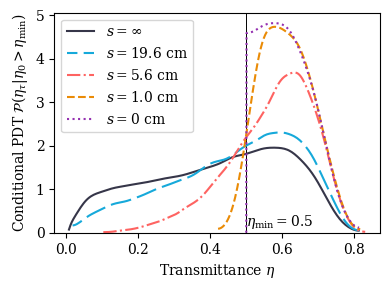

In [3]:
cpdtp = ConditionalPDTPlot(eta_min=0.5)
cpdtp.plot("strong", aperture_radius=0.3, wind_shift=np.inf)
cpdtp.plot("strong", aperture_radius=0.3, wind_shift=0.196, ls=(5, (10, 3)))
cpdtp.plot("strong", aperture_radius=0.3, wind_shift=0.056, ls='-.')
cpdtp.plot("strong_adhoc", aperture_radius=0.3, wind_shift=0.01, ls='--', smooth=10)
cpdtp.plot("strong", aperture_radius=0.3, wind_shift=0, ls=':')
cpdtp.legend()
cpdtp.savefig("plots/2_cond_pdt.pdf")

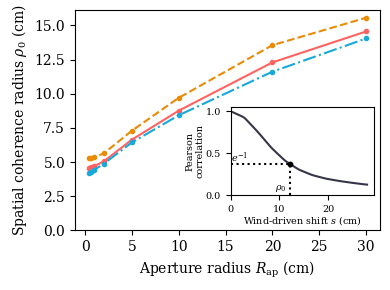

In [20]:
scp = SpatialCoherencePlot()
scp.plot("strong_d2", ls='--', color=utils.LINE_COLORS[2])
scp.plot("strong", color=utils.LINE_COLORS[1])
scp.plot("strong_x1_5", ls='-.', color=utils.LINE_COLORS[0])
scp.plot_example('strong', aperture_size=0.2)
# scp.ax.legend()
scp.ax.set_ylim(bottom=0)
scp.ax.get_figure().tight_layout()
scp.savefig("plots/3_corr_length.pdf")

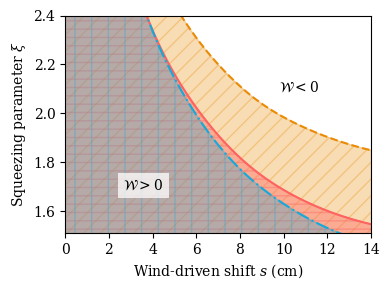

In [17]:
gep = GaussianEntanglementPlot()
gep.plot("strong_d2", aperture_radius=0.2, fill_kwargs={'color': utils.LINE_COLORS[2], 'alpha': 0.3, 'hatch': "//"}, ls='--', color=utils.LINE_COLORS[2])
gep.plot("strong", aperture_radius=0.2, fill_kwargs={'color': utils.LINE_COLORS[1], 'alpha': 0.4, 'hatch': "--"}, color=utils.LINE_COLORS[1])
gep.plot("strong_x1_5", aperture_radius=0.2, fill_kwargs={'color': utils.LINE_COLORS[0], 'alpha': 0.3, 'hatch': "|"}, ls='-.', color=utils.LINE_COLORS[0])
gep.ax.set_xlim(0, 14)
gep.ax.set_ylim(1.51, 2.4)
gep.annotate(pos=((0.19, 0.2), (0.7, 0.65)))
gep.savefig("plots/4_entanglement.pdf")

In [6]:
wcc = WitnessCoherenceCalculator(channels=['strong_d2', 'strong', 'strong_x1_5'], squeezing=[1.6, 2])
wcc_data = wcc.get()

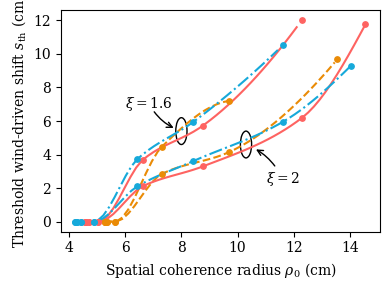

In [14]:
wcp = WitnessCoherencePlot()
wcp.plot(wcc_data, 'strong_d2', color=utils.LINE_COLORS[2], ls='--')
wcp.plot(wcc_data, 'strong', color=utils.LINE_COLORS[1])
wcp.plot(wcc_data, 'strong_x1_5', ls='-.', color=utils.LINE_COLORS[0])
wcp.ellipse_annotate(xy=(8, 5.4), wh=(0.4, 1.6), text=r'$\xi=1.6$', textpos=(6, 6.8), shrinkA=7, shrinkB=6)
wcp.ellipse_annotate(xy=(10.3, 4.6), wh=(0.4, 1.6), text=r'$\xi=2$', textpos=(11, 2.3), shrinkA=11, shrinkB=8)
wcp.savefig("plots/5_witness_coherence.pdf")

In [8]:
bc = BellCalculator(channel_name='strong_adhoc_bell', aperture_radius=0.1, channel_length_km=50, nu=5e-4)
strong_b_10_0db = bc.get(wind_speed=10, db_p_ms=0)
strong_b_5_0db = bc.get(wind_speed=5, db_p_ms=0)
strong_b_10_3db = bc.get(wind_speed=10, db_p_ms=3)
strong_b_5_3db = bc.get(wind_speed=5, db_p_ms=3)

In [9]:
bc = BellCalculator(channel_name='strong', aperture_radius=0.1, channel_length_km=50, nu=5e-4)
strong_10_0db = bc.get(wind_speed=10, db_p_ms=0)
strong_5_0db = bc.get(wind_speed=5, db_p_ms=0)
strong_10_3db = bc.get(wind_speed=10, db_p_ms=3)
strong_5_3db = bc.get(wind_speed=5, db_p_ms=3)

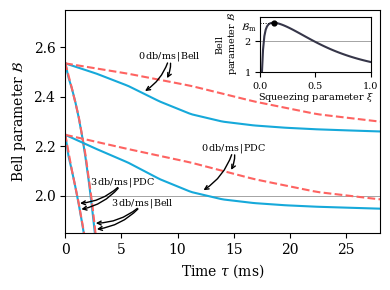

In [10]:
bp = BellPlotTime()
# _params_10 = dict(smooth_value=0.4, bell_kwargs={'color': utils.LINE_COLORS[0]}, pdc_kwargs={'color': utils.LINE_COLORS[1]})
# _params_5 = dict(ls=':', smooth_value=0.4, bell_kwargs={'color': '#7ccfea'}, pdc_kwargs={'color': '#fea8a6'})
_params_10 = dict(smooth_value=0.4, color=utils.LINE_COLORS[0])
_params_5 = dict(ls='--', smooth_value=0.4, color=utils.LINE_COLORS[1])
bp.plot(strong_b_10_3db, wind_speed=10, **_params_10)
bp.plot(strong_b_5_3db, wind_speed=5, **_params_5)
bp.plot(strong_10_0db, wind_speed=10, **_params_10)
bp.plot(strong_5_0db, wind_speed=5, **_params_5, )

bp.plot_example(bc, time=0.028)
bp.ax.set_ylim(bottom=1.85, top=2.75)
bp.ax.set_xlim(0, 28)

arrowprops = dict(arrowstyle="->", color='k', shrinkA=5, shrinkB=1,
                  patchA=None, patchB=None, connectionstyle="arc3,rad=-0.2")
def _annotate(dbms, state, pos, textpos):
    bp.ax.annotate(f'{dbms}$\\thinspace$db/ms$\\thinspace$|{state}', pos[0], textpos, arrowprops=arrowprops, fontsize="x-small")
    bp.ax.annotate(f'{dbms}$\\thinspace$db/ms$\\thinspace$|{state}', pos[1], textpos, arrowprops=arrowprops, fontsize="x-small", alpha=0)

_annotate(0, 'Bell', [(7, 2.42), (9, 2.47)], (6.5, 2.555))
_annotate(0, 'PDC', [(12.2, 2.02), (14.7, 2.1)], (12.1, 2.185))
_annotate(3, 'Bell', [(2.6, 1.89), (2.7, 1.865)], (4.1, 1.96))
_annotate(3, 'PDC', [(1.2, 1.97), (1.32, 1.945)], (2.22, 2.045))
bp.savefig("plots/6_bell.pdf")

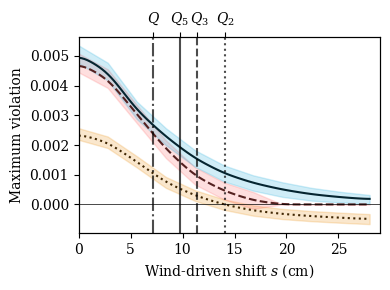

In [12]:
ncp = NonclassicalityPlot()
ncp.plot("strong", aperture_radius=0.3, channel_length_km=50)
ncp.savefig("plots/7_nonclass.pdf")